데이터 모델을 만들기 위해서 첫번째로 해야하는 작업은 데이터에 대해 이해하는 것입니다.

수업에서는 airbnb dataset에서 pricing 모델 만드는 것으로 진행해보겠습니다.

데이터셋은 아래 출처에서 도쿄를 다운받아서 진행해보겠습니다.

https://insideairbnb.com/

In [4]:
import pandas as pd

path = '/content/drive/MyDrive/PD 2401/airbnb'

# 데이터 파일 로드
listings = pd.read_csv(path + '/listings_summary.csv')
reviews = pd.read_csv(path + '/reviews_summary.csv')
neighbourhoods = pd.read_csv(path + '/neighbourhoods_summary.csv')

# 데이터의 처음 몇 줄 확인
listings.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,890199509573985394,东京练马喜美民宿101,513564293,旭昭,NaN,Nerima Ku,35.742539,139.632561,Private room,NaN,1,0,NaN,NaN,5,0,0,M130020725
1,31868772,"B26_JR Yamanote Line walk 1 mins, Nishinippori",158518748,Yang,NaN,Arakawa Ku,35.733870,139.767850,Entire home/apt,14457.0,2,100,2024-03-14,1.60,9,50,37,Hotels and Inns Business Act | 东京都荒川区 | 31 荒保衛...
2,24378724,Ririleo Koenji Room 103. 2 stations from Shinjuku,23956957,Kana,NaN,Suginami Ku,35.701970,139.646170,Entire home/apt,36143.0,1,127,2024-01-28,1.77,3,128,22,M130000221
3,1060499710482458044,【錦糸町駅徒歩6分！】秋葉原、渋谷、新宿まで直通の好立地！#4,481729050,Stay Support,NaN,Sumida Ku,35.697514,139.818927,Entire home/apt,25357.0,1,8,2024-03-30,3.93,10,164,8,M130037832
4,39635344,【Reasonable Price】最大５名 ◎家族、友達、カップルでの贅沢なひとときを★,265089516,Airi,NaN,Taito Ku,35.716680,139.789080,Entire home/apt,NaN,2,0,NaN,NaN,11,0,0,M130020184


컬럼명과 데이터 타입 등을 확인해봅니다.

수치형 데이터와 카테고리형 데이터, 문자 데이터 등 확인 필요


In [5]:
# 각 데이터셋의 기본 정보 출력
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14802 entries, 0 to 14801
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14802 non-null  int64  
 1   name                            14802 non-null  object 
 2   host_id                         14802 non-null  int64  
 3   host_name                       14802 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   14802 non-null  object 
 6   latitude                        14802 non-null  float64
 7   longitude                       14802 non-null  float64
 8   room_type                       14802 non-null  object 
 9   price                           13304 non-null  float64
 10  minimum_nights                  14802 non-null  int64  
 11  number_of_reviews               14802 non-null  int64  
 12  last_review                     

결측치 등을 확인합니다.

결측치에 대해서는 처리방안을 검토합니다.
  - 삭제, 다른값 대체, 빈값으로 처리 등

In [6]:
# 수치형 데이터에 대한 기술 통계
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.480200e+04,1.480200e+04,0.0,14802.000000,14802.000000,13304.000000,14802.000000,14802.000000,13274.000000,14802.000000,14802.000000,14802.000000
mean,5.054206e+17,2.771738e+08,NaN,35.698220,139.736872,26023.196031,3.216727,37.673558,1.684520,14.842994,144.863937,15.236792
std,4.776555e+17,1.782773e+08,NaN,0.041213,0.072984,26600.535204,8.662983,62.974919,1.699287,17.256321,98.144669,22.799074
min,1.976770e+05,3.222340e+05,NaN,35.520940,139.081322,1514.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.971257e+07,1.143995e+08,NaN,35.687292,139.700175,12500.000000,1.000000,4.000000,0.730000,3.000000,67.000000,2.000000
50%,7.057452e+17,2.535594e+08,NaN,35.703730,139.729095,20000.000000,2.000000,16.000000,1.330000,9.000000,136.000000,10.000000
75%,9.792771e+17,4.629849e+08,NaN,35.722168,139.790288,32000.000000,2.000000,45.000000,2.240000,19.000000,216.000000,21.000000
max,1.123144e+18,5.683321e+08,NaN,35.830640,139.914020,999999.000000,365.000000,2447.000000,52.580000,99.000000,365.000000,885.000000


In [7]:
# 데이터셋에서 결측치 확인
print(listings.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               14802
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              1498
minimum_nights                        0
number_of_reviews                     0
last_review                        1528
reviews_per_month                  1528
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                               5
dtype: int64


In [12]:
# neighborhood는 데이터가 없어서 삭제
listings.drop('neighbourhood_group', axis=1, inplace=True)

주요 항목에 대한 분포 등을 살펴봅니다.

Outlier 등을 살펴보고 처리방안이 필요한지도 검토합니다

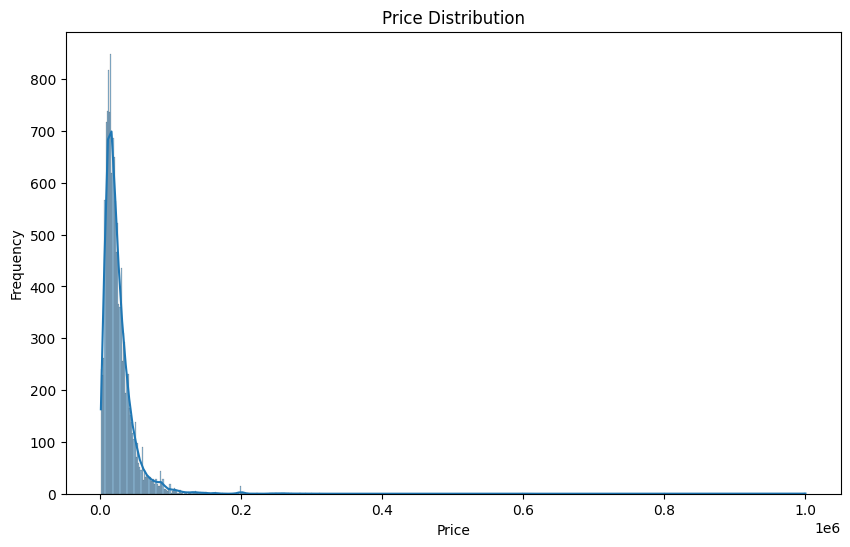

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 가격 데이터의 분포
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


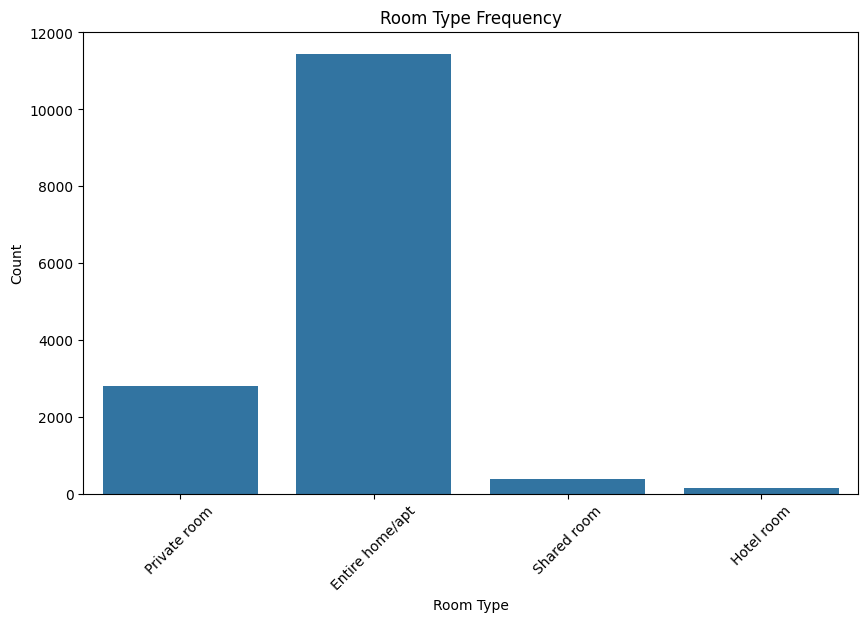

In [14]:
# 리스팅 유형별 빈도수
plt.figure(figsize=(10, 6))
sns.countplot(data=listings, x='room_type')
plt.title('Room Type Frequency')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [15]:
# 숫자형 변수만 선택
numeric_columns = listings.select_dtypes(include=['float64', 'int64']).columns
listings_numeric = listings[numeric_columns]

# 결측치 대체 (예: 평균값으로 대체)
listings_numeric = listings_numeric.fillna(listings_numeric.mean())

# pairplot 생성
sns.pairplot(listings_numeric)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

흥미가 있는데이터를 좀 더 살펴봅시다

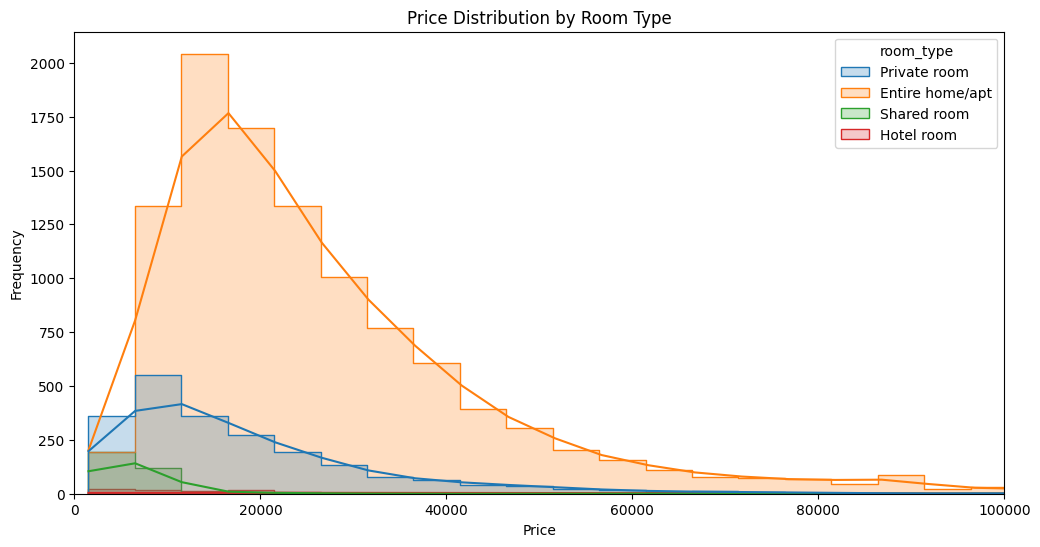

In [16]:
# Room Type 별 가격 분포
plt.figure(figsize=(12, 6))
sns.histplot(data=listings, x='price', hue='room_type', element='step', binwidth=5000, kde=True)
plt.title('Price Distribution by Room Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 100000)  # 10만엔까지의 분포를 보기 위해 x축 제한
import plotly.express as px
import numpy as npplt.show()

Interactive한 차트 출력이 필요할 때는 plotly 라이브러리를 사용할 수 있습니다

In [22]:
import plotly.express as px
import numpy as np

# Plotly로 인터랙티브 히스토그램 생성
fig = px.histogram(listings, x='price', color='minimum_nights_categories',
                   title='Price Distribution by Minimum Nights',
                   labels={'price': 'Price'},
                   category_orders={'minimum_nights_categories': ['1-3 nights', '4-7 nights', '8-30 nights', '30+ nights']},
                   template='plotly_white',
                   opacity=0.8,
                   barmode='group',  # 막대 그룹 모드로 변경
                   histnorm='percent')  # 백분율로 표시

# 각 범주별로 라인 추가
for category in labels:
    group_data = listings[listings['minimum_nights_categories'] == category]
    counts, edges = np.histogram(group_data['price'], bins=np.linspace(0, 100000, 50), density=True)
    centers = 0.5 * (edges[:-1] + edges[1:])
    fig.add_traces(px.line(x=centers, y=counts * 100, labels={'x': 'Price', 'y': 'Density'}).data[0].update(mode='lines+markers', name=f'Line - {category}'))

fig.update_xaxes(range=[0, 100000], title='Price (Yen)')
fig.update_yaxes(title='Frequency (%)')
fig.show()